In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from scipy.signal import lombscargle

from get_data import GetData
import linear_regression as lr

In [3]:
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime(2001, 1, 1)
initial_data = GetData().get_data(start_date, end_date)
initial_data = GetData().transform_data(initial_data)

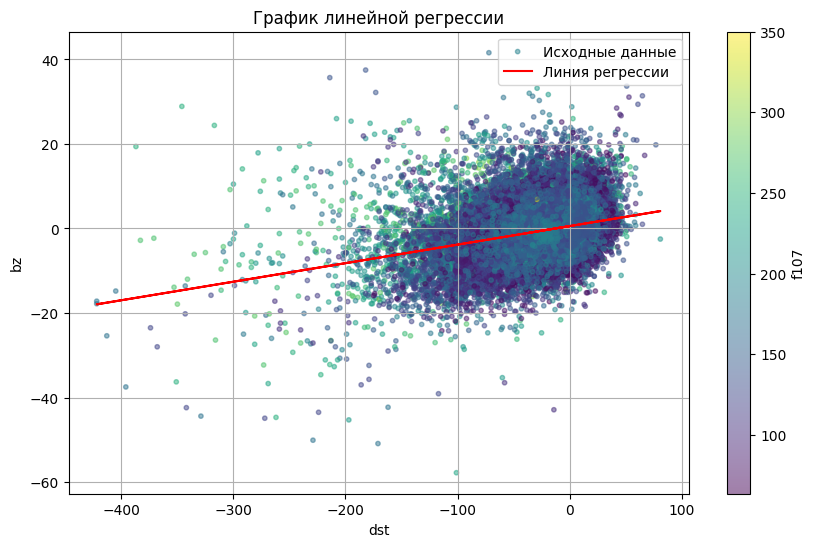

In [4]:
start_date = datetime.datetime(1981, 1, 1)
end_date = datetime.datetime(2024, 1, 1)

initial_data = GetData().get_data(start_date, end_date)
initial_data = GetData().transform_data(initial_data)
first_values = initial_data[0].dst
second_values = initial_data[0].bz
f107_values = initial_data[2].f107.resample('1h').ffill()

# Применяем маску для фильтрации данных на основе значений bz
mask = (second_values <= 900)

# Теперь фильтруем массивы на основании маски
first_values = first_values[mask]
second_values = second_values[mask]
filtered_f107 = f107_values[mask]

# Рассчитываем линию регрессии
regression_line = lr.linear_regression(first_values, second_values)

plt.figure(figsize=(10, 6))
sc = plt.scatter(first_values, second_values, c=filtered_f107, cmap='viridis', label='Исходные данные', s=10, vmax=350, alpha=0.5)
# Добавление линии регрессии
plt.plot(first_values, regression_line, color='red', label='Линия регрессии')
plt.colorbar(sc, label='f107')  # Добавляем цветовую шкалу
plt.grid(True)
plt.xlabel('dst')
plt.ylabel('bz')
plt.title('График линейной регрессии')
plt.legend()
plt.show()

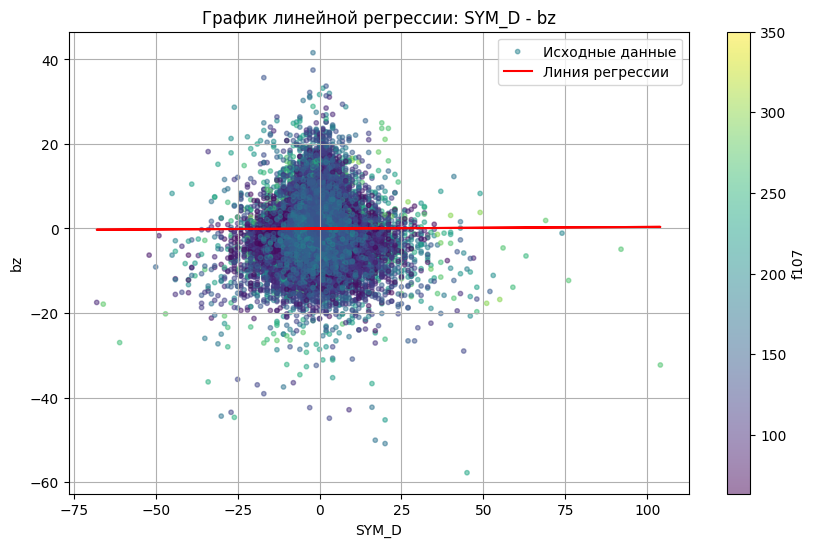

In [5]:
initial_data = GetData().get_data(start_date, end_date)
initial_data = GetData().transform_data(initial_data)
first_values = initial_data[0].SYM_D
second_values = initial_data[0].bz
f107_values = initial_data[2].f107.resample('1h').ffill()

mask = (second_values <= 900)

# Теперь фильтруем массивы на основании маски
first_values = first_values[mask]
first_values = first_values.values.reshape(-1, 1)
second_values = second_values[mask]
filtered_f107 = f107_values[mask]

model = LinearRegression()
model.fit(first_values, second_values)
predicted_values = model.predict(first_values)

plt.figure(figsize=(10, 6))
sc = plt.scatter(first_values, second_values, c=filtered_f107, cmap='viridis', label='Исходные данные', s=10, vmax=350, alpha=0.5)
plt.plot(first_values, predicted_values, color='red', label='Линия регрессии')
plt.colorbar(sc, label='f107')  # Добавляем цветовую шкалу
plt.grid(True)
plt.xlabel('SYM_D')
plt.ylabel('bz')
plt.title('График линейной регрессии: SYM_D - bz')
plt.legend()
plt.show()

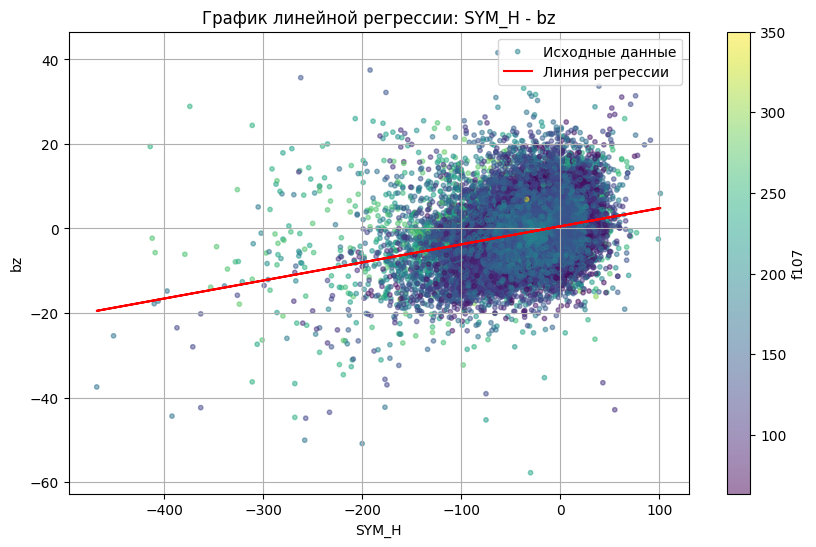

In [6]:
initial_data = GetData().get_data(start_date, end_date)
initial_data = GetData().transform_data(initial_data)
first_values = initial_data[0].SYM_H
second_values = initial_data[0].bz
f107_values = initial_data[2].f107.resample('1h').ffill()

mask = (second_values <= 900)

# Теперь фильтруем массивы на основании маски
first_values = first_values[mask]
first_values = first_values.values.reshape(-1, 1)
second_values = second_values[mask]
filtered_f107 = f107_values[mask]

model = LinearRegression()
model.fit(first_values, second_values)
predicted_values = model.predict(first_values)

plt.figure(figsize=(10, 6))
sc = plt.scatter(first_values, second_values, c=filtered_f107, cmap='viridis', label='Исходные данные', s=10, vmax=350, alpha=0.5)
plt.plot(first_values, predicted_values, color='red', label='Линия регрессии')
plt.colorbar(sc, label='f107')  # Добавляем цветовую шкалу

plt.grid(True)
plt.xlabel('SYM_H')
plt.ylabel('bz')
plt.title('График линейной регрессии: SYM_H - bz')
plt.legend()
plt.show()

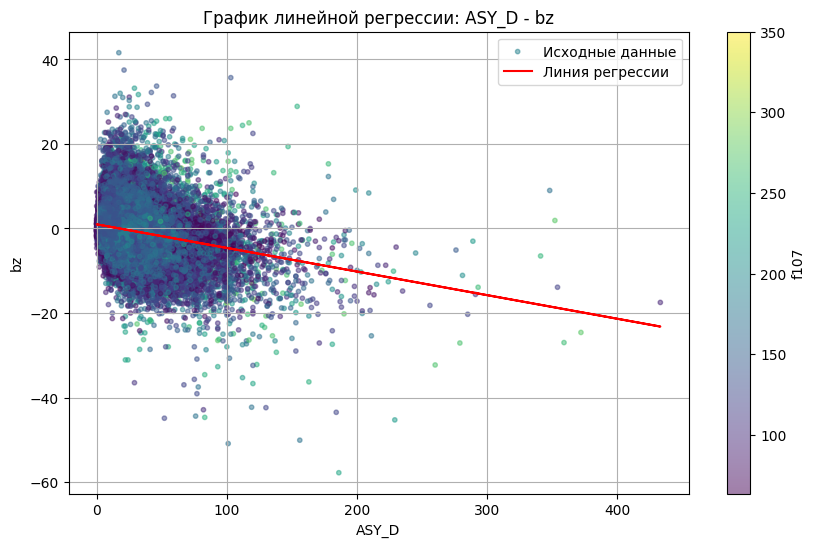

In [7]:
initial_data = GetData().get_data(start_date, end_date)
initial_data = GetData().transform_data(initial_data)
first_values = initial_data[0].ASY_D
second_values = initial_data[0].bz
f107_values = initial_data[2].f107.resample('1h').ffill()

mask = (second_values <= 900)

# Теперь фильтруем массивы на основании маски
first_values = first_values[mask]
first_values = first_values.values.reshape(-1, 1)
second_values = second_values[mask]
filtered_f107 = f107_values[mask]

model = LinearRegression()
model.fit(first_values, second_values)
predicted_values = model.predict(first_values)

plt.figure(figsize=(10, 6))
sc = plt.scatter(first_values, second_values, c=filtered_f107, cmap='viridis', label='Исходные данные', s=10, vmax=350, alpha=0.5)
plt.plot(first_values, predicted_values, color='red', label='Линия регрессии')
plt.colorbar(sc, label='f107')  # Добавляем цветовую шкалу

plt.grid(True)
plt.xlabel('ASY_D')
plt.ylabel('bz')
plt.title('График линейной регрессии: ASY_D - bz')
plt.legend()
plt.show()

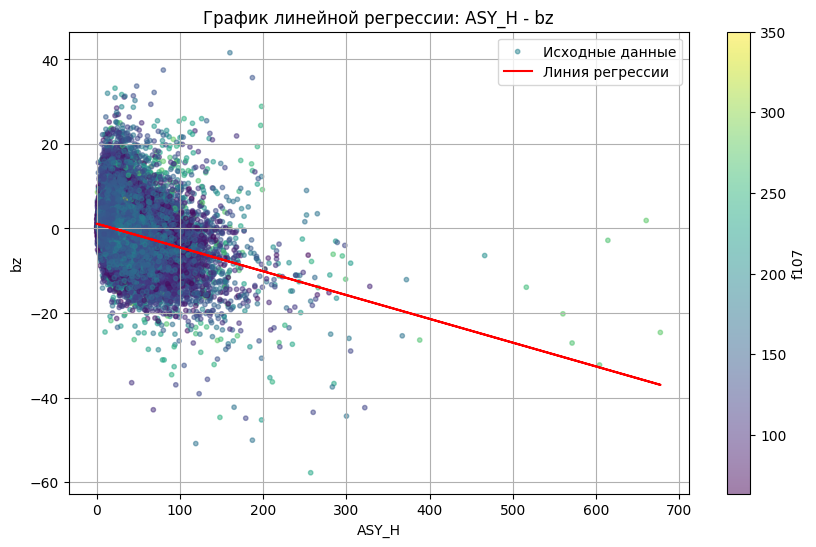

In [8]:
initial_data = GetData().get_data(start_date, end_date)
initial_data = GetData().transform_data(initial_data)
first_values = initial_data[0].ASY_H
second_values = initial_data[0].bz
f107_values = initial_data[2].f107.resample('1h').ffill()

mask = (second_values <= 900)

# Теперь фильтруем массивы на основании маски
first_values = first_values[mask]
first_values = first_values.values.reshape(-1, 1)
second_values = second_values[mask]
filtered_f107 = f107_values[mask]

model = LinearRegression()
model.fit(first_values, second_values)
predicted_values = model.predict(first_values)

plt.figure(figsize=(10, 6))
sc = plt.scatter(first_values, second_values, c=filtered_f107, cmap='viridis', label='Исходные данные', s=10, vmax=350, alpha=0.5)
plt.plot(first_values, predicted_values, color='red', label='Линия регрессии')
plt.colorbar(sc, label='f107')  # Добавляем цветовую шкалу
plt.grid(True)
plt.xlabel('ASY_H')
plt.ylabel('bz')
plt.title('График линейной регрессии: ASY_H - bz')
plt.legend()
plt.show()

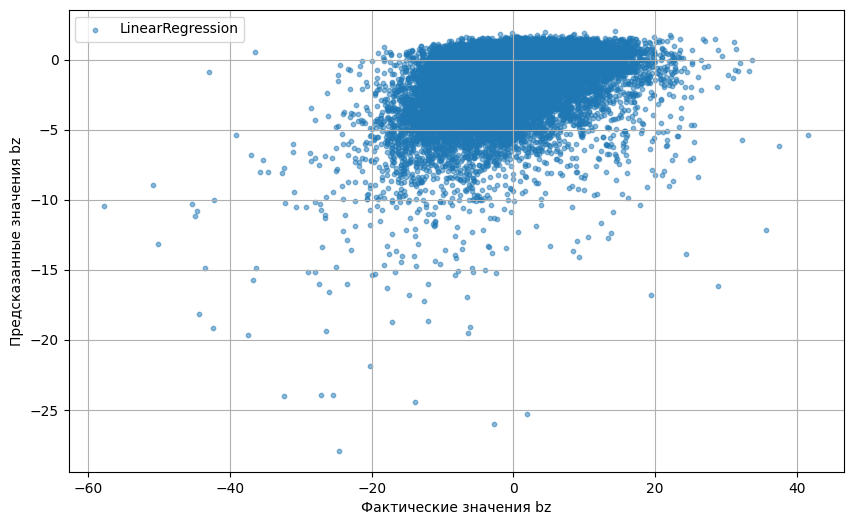

In [9]:
names = ['ASY_D', 'ASY_H', 'SYM_H', 'SYM_D']
bz_values = initial_data[0].bz
mask = (bz_values <= 900)
x = initial_data[0].loc[mask][names].values
y = bz_values[mask].values

model = LinearRegression()
model.fit(x, y)
predict = model.predict(x)

plt.figure(figsize=(10, 6))
plt.scatter(y, predict, label='LinearRegression', s=10, alpha=0.5)
plt.grid(True)
plt.xlabel('Фактические значения bz')
plt.ylabel('Предсказанные значения bz')
plt.legend()
plt.show()

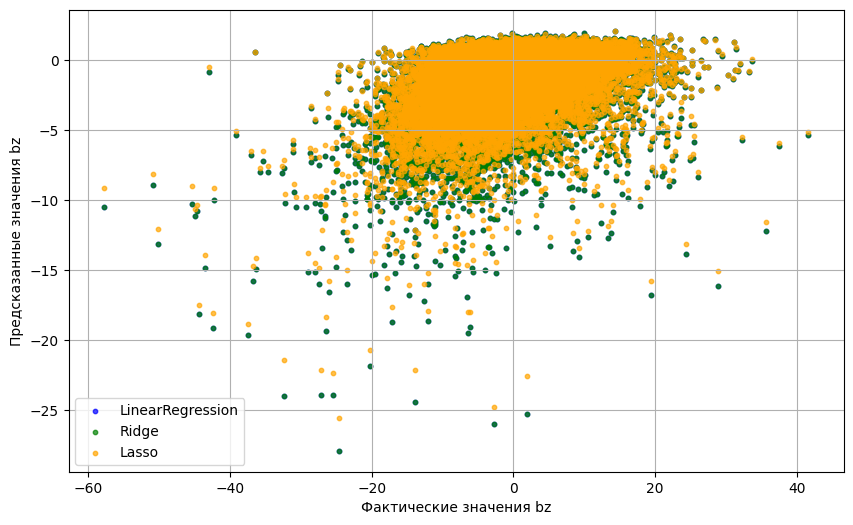

In [10]:
names = ['ASY_D', 'ASY_H', 'SYM_H', 'SYM_D']
bz_values = initial_data[0].bz
mask = (bz_values <= 900)
x = initial_data[0].loc[mask][names].values
y = bz_values[mask].values

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}
predicts = {}

for name, model in models.items():
    model.fit(x, y)
    predicts[name] = model.predict(x)

plt.figure(figsize=(10, 6))

colors = {
    'LinearRegression': 'blue',
    'Ridge': 'green',
    'Lasso': 'orange'
}

for name, prediction in predicts.items():
    plt.scatter(y, prediction, label=name, s=10, alpha=0.7, c=colors[name])

plt.grid(True)
plt.xlabel('Фактические значения bz')
plt.ylabel('Предсказанные значения bz')
plt.legend()
plt.show()

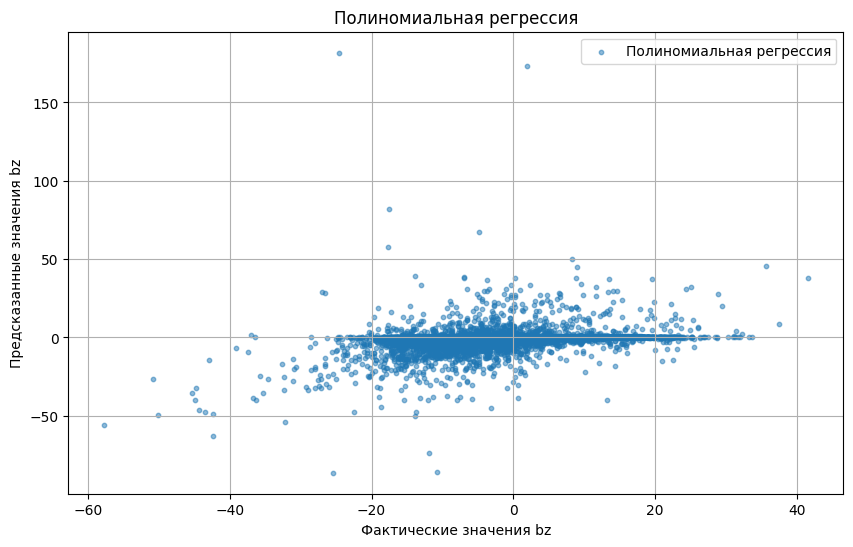

In [11]:
names = ['ASY_D', 'ASY_H', 'SYM_H', 'SYM_D']
bz_values = initial_data[0].bz
mask = (bz_values <= 900)
x = initial_data[0].loc[mask][names].values
y = bz_values[mask].values

degree = 12
polynomial_features = PolynomialFeatures(degree=degree)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
predict = model.predict(x_poly)

plt.figure(figsize=(10, 6))
plt.scatter(y, predict, label='Полиномиальная регрессия', s=10, alpha=0.5)
plt.grid(True)
plt.xlabel('Фактические значения bz')
plt.ylabel('Предсказанные значения bz')
plt.legend()
plt.title(f'Полиномиальная регрессия')
plt.show()

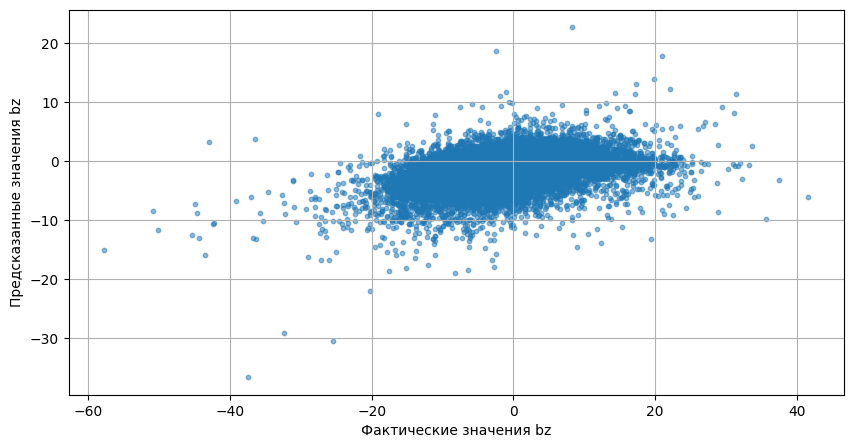

In [12]:
# полиномы в ручную
names = ['ASY_D', 'ASY_H', 'SYM_H', 'SYM_D']
bz_values = initial_data[0].bz
mask = (bz_values <= 900)
x = initial_data[0].loc[mask][names].values
y = bz_values[mask].values

def create_polynomial_features(x, degree):
    x_poly = x
    for i in range(2, degree + 1):
        x_poly = np.concatenate((x_poly, np.power(x, i)), axis=1)
    return np.concatenate((np.ones((x.shape[0], 1)), x_poly), axis=1)

def polynomial_regression(x, y, degree):
    x_poly = create_polynomial_features(x, degree)
    model = LinearRegression()
    model.fit(x_poly, y)
    predict = model.predict(x_poly)
    return model, predict

plt.figure(figsize=(10, 5))
model, predict = polynomial_regression(x, y, 5)
plt.scatter(y, predict, s=10, alpha=0.5)
plt.grid(True)
plt.xlabel('Фактические значения bz')
plt.ylabel('Предсказанные значения bz')
plt.show()

In [ ]:
# Регрессор
names = ['ASY_D', 'ASY_H', 'SYM_H', 'SYM_D']
bz_values = initial_data[0].bz
mask = (bz_values <= 900)
x = initial_data[0].loc[mask][names].values
y = bz_values[mask].values

# regressor = MLPRegressor(hidden_layer_sizes=(4000, 2000, 1000, 500, 250, 125, 65), max_iter=2000, solver='adam', random_state=13) - 0.19
# regressor = MLPRegressor(hidden_layer_sizes=(1000, 500, 250, 125, 65), max_iter=1000, solver='adam', random_state=13) - 0.77
# regressor = MLPRegressor(hidden_layer_sizes=(1000, 500, 250, 125, 65), max_iter=2000, solver='adam', random_state=13) - 0.77
# regressor = MLPRegressor(hidden_layer_sizes=(2000, 1000, 500, 250, 125), max_iter=1000, solver='adam', random_state=13) - 0.79
# regressor = MLPRegressor(hidden_layer_sizes=(1250, 1000, 500, 250, 125), max_iter=1000, solver='adam', random_state=13) - 0.8
# regressor = MLPRegressor(hidden_layer_sizes=(1500, 1000, 500, 250, 125), max_iter=1000, solver='adam', random_state=13) - 0.84
regressor = MLPRegressor(hidden_layer_sizes=(1500, 1000, 500, 250, 125), max_iter=1000, solver='adam', random_state=13) 

regressor.fit(x, y)
score = regressor.score(x, y)
print(score)

# Получение предсказаний
y_pred = regressor.predict(x)

plt.figure(figsize=(8, 8))

plt.scatter(y, y_pred, alpha=0.5)
plt.grid(True)
plt.xlabel('Фактические значения Bz')
plt.ylabel('Предсказанные значения Bz')

plt.tight_layout()
plt.show()

Train R^2 Score: 0.5667335331793121
Test R^2 Score: -0.17349485380948493


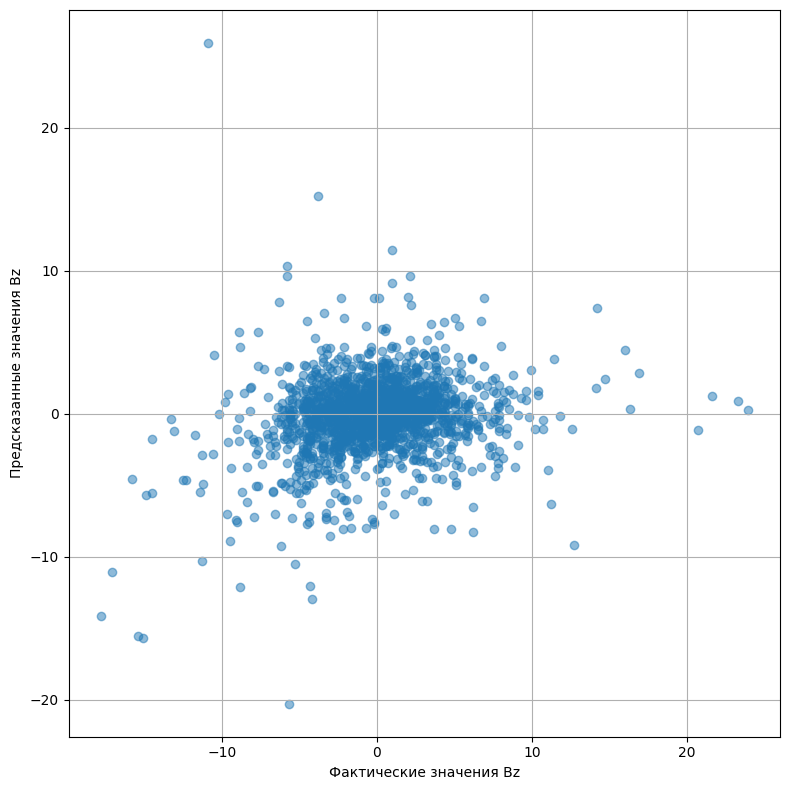

In [15]:
# Регрессор
names = ['ASY_D', 'ASY_H', 'SYM_H', 'SYM_D']
bz_values = initial_data[0].bz
mask = (bz_values <= 900)
x = initial_data[0].loc[mask][names].values
y = bz_values[mask].values

# Разделение на обучающую и тестовую выборки
n = len(y)
split_index = n * 4 // 5

x_train, x_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Инициализация и обучение регрессора
regressor = MLPRegressor(hidden_layer_sizes=(1500, 1000, 500, 250, 125), max_iter=1000, solver='adam', random_state=13)
regressor.fit(x_train, y_train)

# Оценка качества на обучающей выборке
train_score = regressor.score(x_train, y_train)
print(f"Train R^2 Score: {train_score}")

# Валидация на тестовой выборке
test_score = regressor.score(x_test, y_test)
y_pred_test = regressor.predict(x_test)

print(f"Test R^2 Score: {test_score}")

# Визуализация результатов
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.grid(True)
plt.xlabel('Фактические значения Bz')
plt.ylabel('Предсказанные значения Bz')
plt.tight_layout()
plt.show()

Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
Test R^2 Score with best parameters: 0.13117134061357938


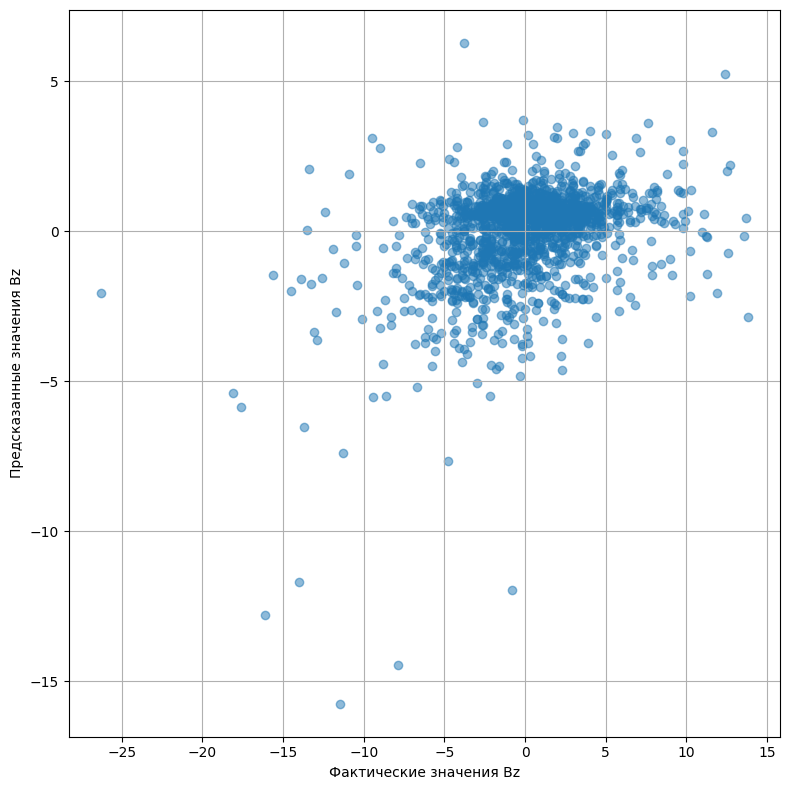

In [22]:
# Регрессор
names = ['ASY_D', 'ASY_H', 'SYM_H', 'SYM_D']
bz_values = initial_data[0].bz
mask = (bz_values <= 900)
x = initial_data[0].loc[mask][names].values
y = bz_values[mask].values
# Масштабирование данных
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Разделение на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Настройка параметров для Grid Search
parameter_space = {
    'hidden_layer_sizes': [(50,), (100,), (150, 100), (150, 100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [500, 1000, 2000]
}

# Модель для подбора
mlp = MLPRegressor(random_state=42)

# GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(x_train, y_train)

# Лучшие параметры
print(f"Best parameters found: {clf.best_params_}")

# Оценка модели с лучшими параметрами на тестовой выборке
test_score = clf.score(x_test, y_test)
y_pred_test = clf.predict(x_test)
print(f"Test R^2 Score with best parameters: {test_score}")

# Визуализация результатов
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.grid(True)
plt.xlabel('Фактические значения Bz')
plt.ylabel('Предсказанные значения Bz')
plt.tight_layout()
plt.show()

In [ ]:
# Регрессор
names = ['ASY_D', 'ASY_H', 'SYM_H', 'SYM_D']
bz_values = initial_data[0].bz
mask = (bz_values <= 900)
x = initial_data[0].loc[mask][names].values
y = bz_values[mask].values

# Добавление полиномиальных признаков
# poly = PolynomialFeatures(degree=15)
# x_poly = poly.fit_transform(x)

# Определение количества наблюдений
n = len(y)

# Разделение данных на обучающую и тестовую выборки
split_point = n - n // 5
x_train, x_test = x[:split_point], x[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

# Поиск лучшей конфигурации
best_test_score = -np.inf
best_config = None

for i in range(250):
    # Конфигурация слоя
    hidden_layers = (10 + (i+2)//2, 10 + (i+1)//2, 10 + i//2)
    
    # Инициализация и обучение регрессора
    regressor = MLPRegressor(hidden_layer_sizes=hidden_layers, max_iter=500, solver='adam', random_state=13, alpha=0.1)
    regressor.fit(x_train, y_train)
    
    # Оценка качества на тестовой выборке
    test_score = regressor.score(x_test, y_test)
    
    if test_score > best_test_score:
        best_test_score = test_score
        best_config = hidden_layers

    print(f"Итерация {i+1}: Слои {hidden_layers} | Score: {test_score}")

# Обучение и оценка лучшей конфигурации
regressor = MLPRegressor(hidden_layer_sizes=best_config, max_iter=500, solver='adam', random_state=13, alpha=0.1)
regressor.fit(x_train, y_train)

train_score = regressor.score(x_train, y_train)
test_score = regressor.score(x_test, y_test)
y_pred_test = regressor.predict(x_test)

print(f"Лучшая конфигурация: Слои {best_config}")

# Визуализация результатов
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.grid(True)
plt.xlabel('Фактические значения Bz')
plt.ylabel('Предсказанные значения Bz')
plt.tight_layout()
plt.show()

Итерация 1: Слои (11, 10) | Score: 0.12496301977474522
Итерация 2: Слои (11, 11) | Score: 0.13140768311291973
Итерация 3: Слои (12, 11) | Score: 0.13909479657464396
Итерация 4: Слои (12, 12) | Score: 0.12770293179045233
Итерация 5: Слои (13, 12) | Score: 0.1318232347201319
Итерация 6: Слои (13, 13) | Score: 0.11984749340930712
Итерация 7: Слои (14, 13) | Score: 0.13130262878442123
Итерация 8: Слои (14, 14) | Score: 0.13768981305121197
Итерация 9: Слои (15, 14) | Score: 0.12374273591381846
Итерация 10: Слои (15, 15) | Score: 0.12710156767888336
Итерация 11: Слои (16, 15) | Score: 0.13742108216728266
Итерация 12: Слои (16, 16) | Score: 0.12784037841007312
Итерация 13: Слои (17, 16) | Score: 0.13127950931798027
Итерация 14: Слои (17, 17) | Score: 0.11979937121664397
Итерация 15: Слои (18, 17) | Score: 0.12823670801080678
Итерация 16: Слои (18, 18) | Score: 0.12669693687561678
Итерация 17: Слои (19, 18) | Score: 0.1265381938870358
Итерация 18: Слои (19, 19) | Score: 0.1253678608639195
Итер